### Predict Consumer Electronics Sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/consumer_electronics_sales_data.csv')
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [6]:
df.drop('ProductID',axis=1,inplace=True)
df.columns = df.columns.str.lower()
df.columns

Index(['productcategory', 'productbrand', 'productprice', 'customerage',
       'customergender', 'purchasefrequency', 'customersatisfaction',
       'purchaseintent'],
      dtype='object')

#### ProductBrand: Brand of the product (e.g., Apple, Samsung).
#### ProductPrice: Price of the product 
#### CustomerAge: Age of the customer.
#### CustomerGender: Gender of the customer (0 - Male, 1 - Female).
#### PurchaseFrequency: Average number of purchases per year.
#### CustomerSatisfaction: Customer satisfaction rating (1 - 5).
#### PurchaseIntent (Target Variable): Intent to purchas

In [7]:
df.productcategory.value_counts()

productcategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

<Axes: xlabel='productcategory', ylabel='count'>

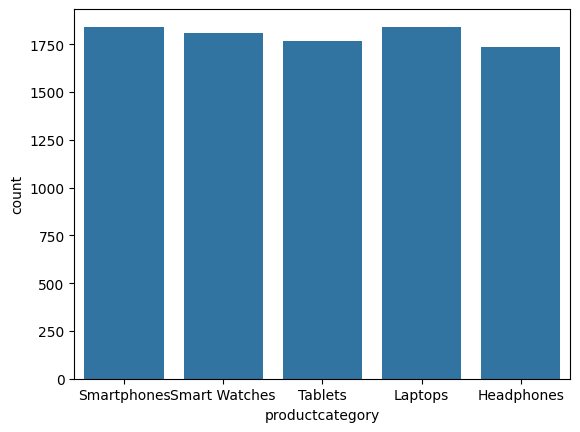

In [8]:
sns.countplot(x=df.productcategory)

In [9]:
df.productbrand.value_counts()

productbrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

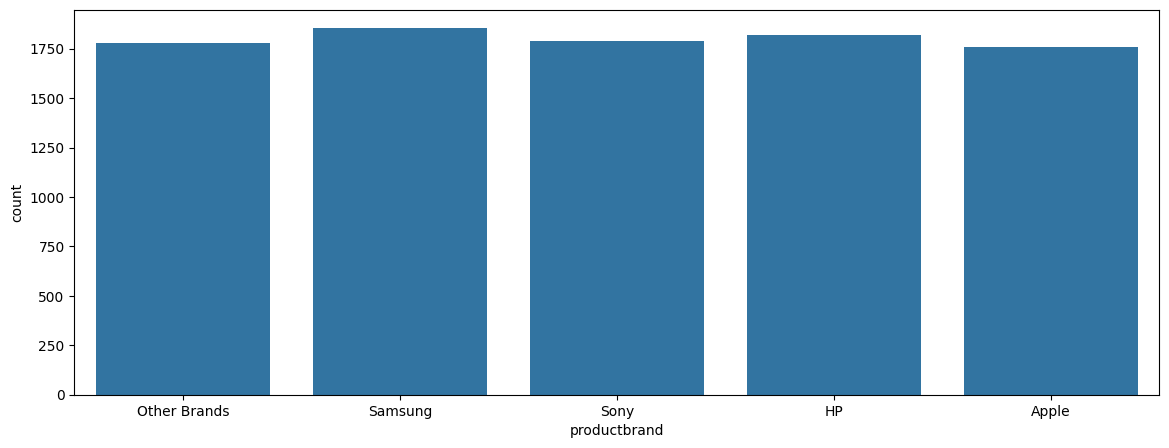

In [10]:
plt.figure(figsize=(14,5))
sns.countplot(x=df.productbrand)
plt.show()

<Axes: xlabel='productprice', ylabel='Count'>

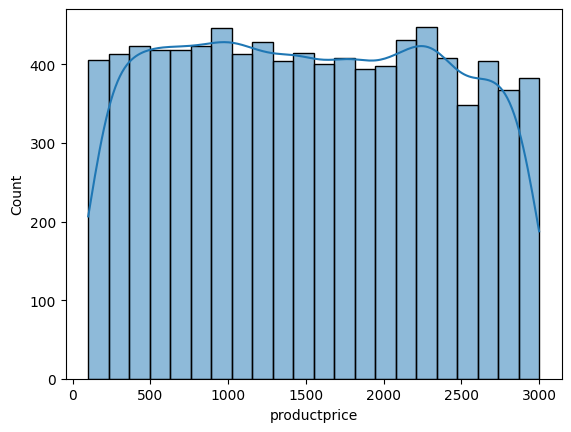

In [11]:
sns.histplot(x=df.productprice,kde=True)

<Axes: xlabel='productprice'>

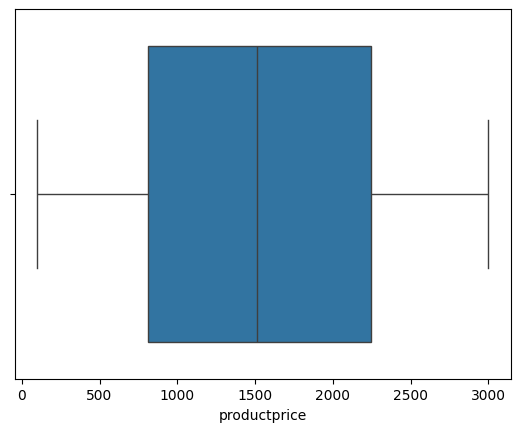

In [12]:
sns.boxplot(x=df.productprice)

<Axes: xlabel='customerage', ylabel='Count'>

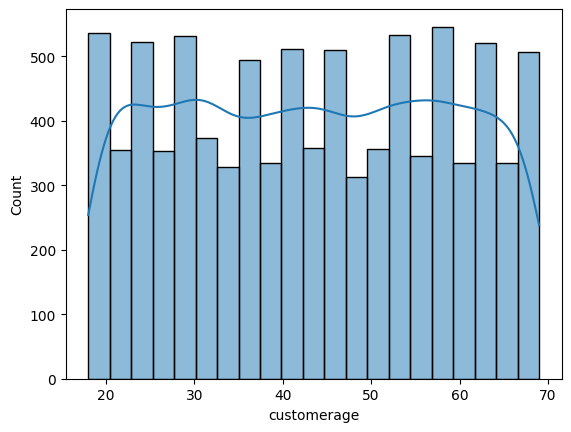

In [13]:
sns.histplot(x=df.customerage,kde=True)

<Axes: xlabel='customerage'>

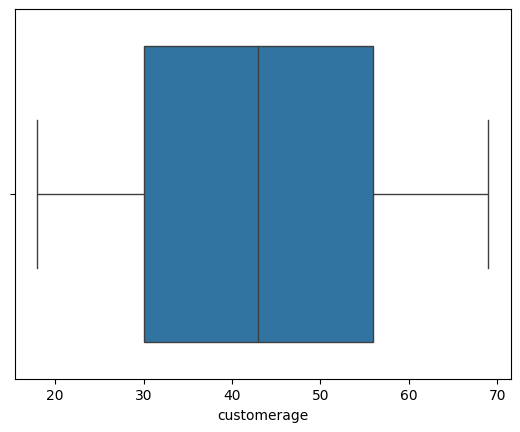

In [14]:
sns.boxplot(x=df.customerage)

In [15]:
df.customergender.value_counts()

customergender
1    4580
0    4420
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

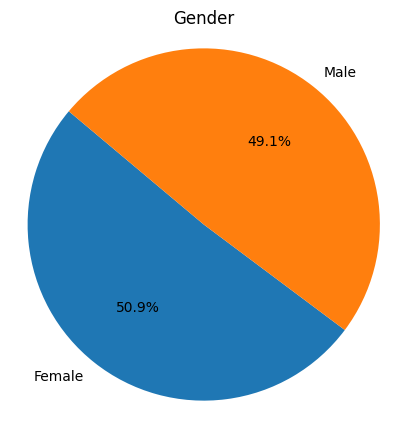

In [16]:
labels = ['Female','Male']
sizes = df['customergender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Gender')

<Axes: xlabel='purchasefrequency', ylabel='Count'>

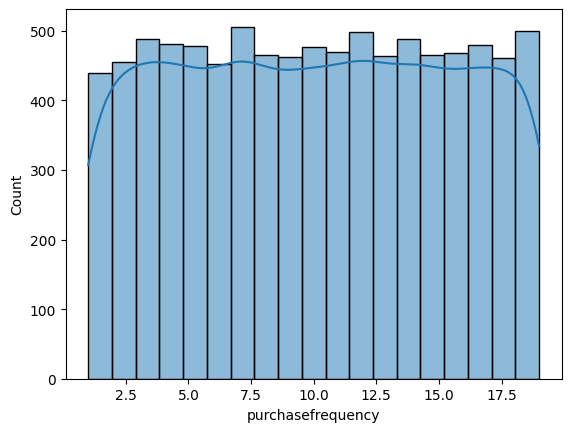

In [17]:
sns.histplot(x=df.purchasefrequency,kde=True)

<Axes: ylabel='purchasefrequency'>

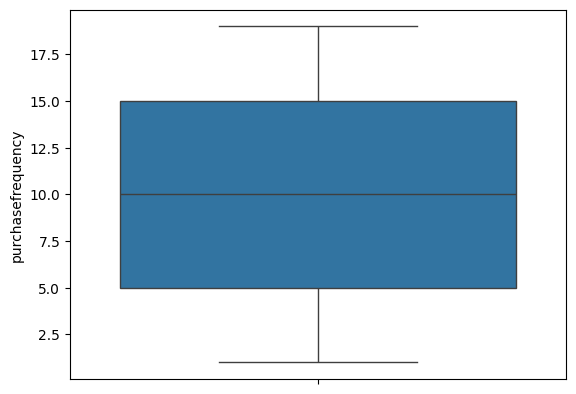

In [18]:
sns.boxplot(df.purchasefrequency)

In [19]:
df.customersatisfaction.value_counts()

customersatisfaction
3    1848
2    1814
4    1798
1    1775
5    1765
Name: count, dtype: int64

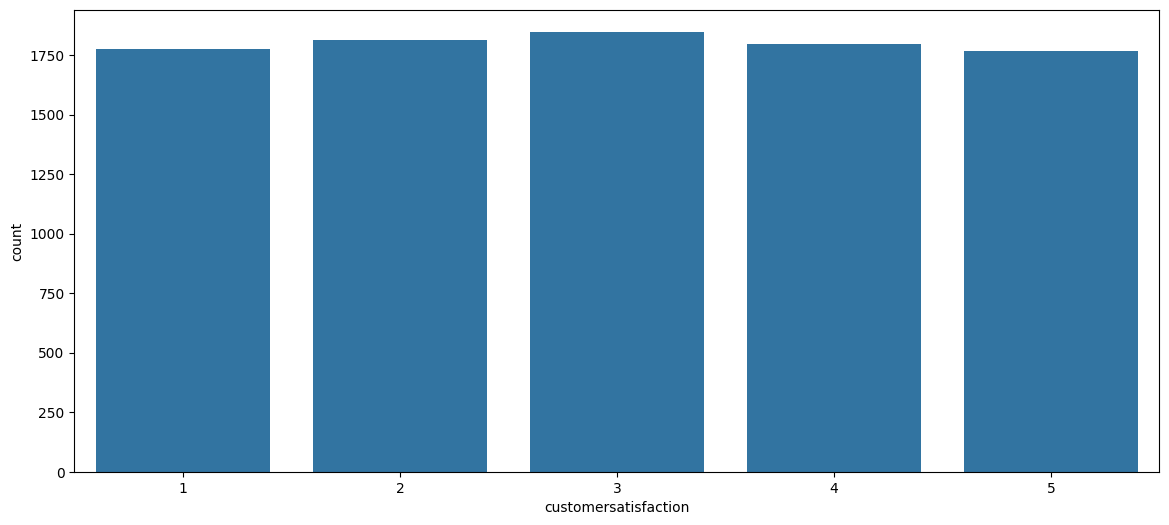

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x=df.customersatisfaction)
plt.show()

In [21]:
df.purchaseintent.value_counts()

purchaseintent
1    5098
0    3902
Name: count, dtype: int64

Text(0.5, 1.0, 'Intent')

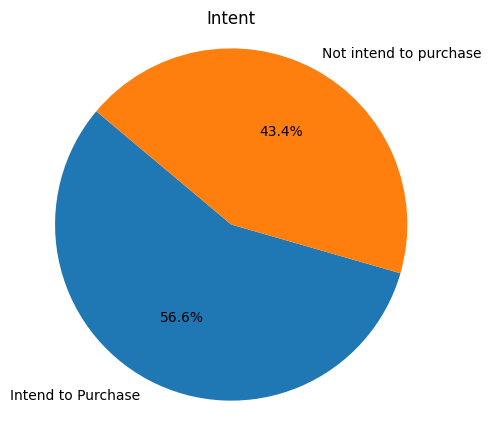

In [22]:
labels = ['Intend to Purchase','Not intend to purchase']
sizes = df['purchaseintent'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Intent')

In [23]:
df.head()

,productcategory,productbrand,productprice,customerage,customergender,purchasefrequency,customersatisfaction,purchaseintent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


In [24]:
df.productcategory = df.productcategory.map({
    'Laptops':0,
    'Smartphones':1,
    'Smart Watches':2,
    'Tablets':3,
    'Headphones':4
})
df.productbrand = df.productbrand.map({
    'Samsung':0,
    'HP':1,
    'Sony':2,
    'Other Brands':3,
    'Apple':4
})

In [25]:
df.head()

,productcategory,productbrand,productprice,customerage,customergender,purchasefrequency,customersatisfaction,purchaseintent
0,1,3,312.949668,18,0,2,1,0
1,2,0,980.389404,35,1,7,2,1
2,3,0,2606.718293,63,0,1,5,1
3,1,0,870.395450,63,1,10,3,1
4,3,2,1798.955875,57,0,17,3,0


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
X = df.drop('purchaseintent',axis=1)
y = df['purchaseintent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [30]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.023283
0:	learn: 0.6616265	total: 591ms	remaining: 9m 50s
1:	learn: 0.6319390	total: 599ms	remaining: 4m 58s
2:	learn: 0.6039859	total: 606ms	remaining: 3m 21s
3:	learn: 0.5788010	total: 614ms	remaining: 2m 32s
4:	learn: 0.5543115	total: 636ms	remaining: 2m 6s
5:	learn: 0.5322190	total: 657ms	remaining: 1m 48s
6:	learn: 0.5107787	total: 676ms	remaining: 1m 35s
7:	learn: 0.4906810	total: 688ms	remaining: 1m 25s
8:	learn: 0.4717883	total: 701ms	remaining: 1m 17s
9:	learn: 0.4551377	total: 708ms	remaining: 1m 10s
10:	learn: 0.4385035	total: 715ms	remaining: 1m 4s
11:	learn: 0.4230824	total: 720ms	remaining: 59.3s
12:	learn: 0.4080417	total: 729ms	remaining: 55.4s
13:	learn: 0.3951003	total: 735ms	remaining: 51.8s
14:	learn: 0.3821031	total: 742ms	remaining: 48.7s
15:	learn: 0.3699342	total: 748ms	remaining: 46s
16:	learn: 0.3585205	total: 754ms	remaining: 43.6s
17:	learn: 0.3478658	total: 761ms	remaining: 41.5s
18:	learn: 0.3389506	total: 765ms	remaining: 39.5s
19:	

In [31]:
df.head()

,productcategory,productbrand,productprice,customerage,customergender,purchasefrequency,customersatisfaction,purchaseintent
0,1,3,312.949668,18,0,2,1,0
1,2,0,980.389404,35,1,7,2,1
2,3,0,2606.718293,63,0,1,5,1
3,1,0,870.395450,63,1,10,3,1
4,3,2,1798.955875,57,0,17,3,0


In [32]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/consumer_data.csv',index=False)